# K-means clustering

## import library

In [694]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [695]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

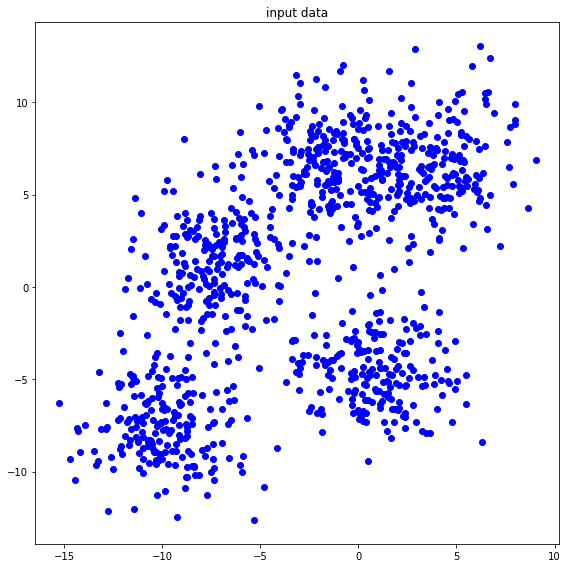

In [696]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [697]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    difference=feature-center # n x m 
    distance=(difference[:,0]**2+difference[:,1]**2)**(1/2) # n x 1
    # print(center.shape)
    # print(distance.shape)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [698]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks 
    #
    # print(label_feature.shape)
    # label_feature_temp=np.c_[label_feature,np.ones(len(label_feature))]
    # target_feature=feature[label_feature_temp[:,0] == label]
    # print(label_feature_temp)
    
    # print(label_feature)
    # print(feature)
    target_feature=feature[label_feature == label]
    # print(target_feature)
    center_x=target_feature[:,0].mean()
    center_y=target_feature[:,1].mean()
    centroid=np.c_[center_x,center_y] # 1 x m
    # print(centroid.shape) 
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [699]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    label_feature=np.argmin(distance,axis=1)
    # print(label_feature.shape)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


## the number of clusters $K = 2$

In [700]:
number_cluster          = 2
number_iteration        = 5     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
print(centroid_iteration_02.shape)
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))
print(label_feature_02[0])

(5, 2, 2)
0


In [701]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros((number_data,number_cluster))
centroid = centroid_iteration_02
label_feature=label_feature_02
label=np.array(range(number_cluster))
# print(label)

for iteration in range(number_iteration):
    for i in label:
        center= compute_centroid(feature, label_feature,i) 
        centroid[iteration,i,:] =center
        # print(center)
        # print(compute_distance(feature, center))
        # print(distance.shape)
        distance[:,i] = compute_distance(feature, center) #n x 1 -> n x k
    # print(distance.shape)

    label_feature = compute_label(distance)
    # print(label_feature.shape)
    # print(label_feature)
    loss=0
    for i in label:
        target_feature=feature[label_feature == i]
        difference=target_feature-centroid[iteration,i,:]
        distance_each=(difference[:,0]**2+difference[:,1]**2)**(1/2)
        loss+=distance_each.mean()

    loss_iteration_02[iteration]     = loss
    print(loss_iteration_02)
    centroid_iteration_02 = centroid
    label_feature_02  = label_feature

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

[15.17494311  0.          0.          0.          0.        ]
[15.17494311 10.39386251  0.          0.          0.        ]
[15.17494311 10.39386251 10.15163263  0.          0.        ]
[15.17494311 10.39386251 10.15163263 10.00564893  0.        ]
[15.17494311 10.39386251 10.15163263 10.00564893  9.94281182]


## the number of clusters $K = 4$

In [702]:
number_cluster          = 4
number_iteration        = 5     # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [703]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros((number_data,number_cluster))
centroid = centroid_iteration_04
label_feature=label_feature_04
label=np.array(range(number_cluster))

for iteration in range(number_iteration):
    for i in label:
        center= compute_centroid(feature, label_feature,i) 
        centroid[iteration,i,:] =center
        distance[:,i] = compute_distance(feature, center)

    label_feature = compute_label(distance)

    loss=0
    for i in label:
        target_feature=feature[label_feature == i]
        difference=target_feature-centroid[iteration,i,:]
        distance_each=(difference[:,0]**2+difference[:,1]**2)**(1/2)
        # print(distance_each.mean())
        loss+=distance_each.mean()

    loss_iteration_04[iteration]     = loss
    # print(loss)
    centroid_iteration_04 = centroid
    label_feature_04  = label_feature

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [704]:
number_cluster          = 8
number_iteration        = 20     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [705]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros((number_data,number_cluster))
centroid = centroid_iteration_08
label_feature=label_feature_08
label=np.array(range(number_cluster))

for iteration in range(number_iteration):
    for i in label:
        center= compute_centroid(feature, label_feature,i) 
        centroid[iteration,i,:] =center
        distance[:,i] = compute_distance(feature, center)

    label_feature = compute_label(distance)
    
    loss=0
    for i in label:
        target_feature=feature[label_feature == i]
        difference=target_feature-centroid[iteration,i,:]
        distance_each=(difference[:,0]**2+difference[:,1]**2)**(1/2)
        # print(distance_each.shape)
        # print("=============")
        loss+=distance_each.mean()

    loss_iteration_08[iteration]     = loss
    centroid_iteration_08 = centroid
    label_feature_08  = label_feature

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

<ipython-input-705-bdf48ab1b4c9>:24: RuntimeWarning: Mean of empty slice.
  loss+=distance_each.mean()
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-698-987c553060b1>:15: RuntimeWarning: Mean of empty slice.
  center_x=target_feature[:,0].mean()
<ipython-input-698-987c553060b1>:16: RuntimeWarning: Mean of empty slice.
  center_y=target_feature[:,1].mean()


## the number of clusters $K = 16$

In [706]:
number_cluster          = 16
number_iteration        = 30   # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [707]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
distance = np.zeros((number_data,number_cluster))
centroid = centroid_iteration_16
label_feature=label_feature_16
label=np.array(range(number_cluster))

for iteration in range(number_iteration):
    for i in label:
        center= compute_centroid(feature, label_feature,i) 
        centroid[iteration,i,:] =center
        distance[:,i] = compute_distance(feature, center)

    label_feature = compute_label(distance)
    loss=0
    for i in label:
        target_feature=feature[label_feature == i]
        difference=target_feature-centroid[iteration,i,:]
        distance_each=(difference[:,0]**2+difference[:,1]**2)**(1/2)
        loss+=distance_each.mean()

    loss_iteration_16[iteration]     = loss
    label_feature_16  = label_feature

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

<ipython-input-707-1c258541d8e1>:21: RuntimeWarning: Mean of empty slice.
  loss+=distance_each.mean()
<ipython-input-698-987c553060b1>:15: RuntimeWarning: Mean of empty slice.
  center_x=target_feature[:,0].mean()
<ipython-input-698-987c553060b1>:16: RuntimeWarning: Mean of empty slice.
  center_y=target_feature[:,1].mean()


---

---

## functions for presenting the results

---

---

In [708]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [709]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [710]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [711]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [712]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [713]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [714]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [715]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [716]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [717]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [718]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [719]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [720]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [721]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [722]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [723]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) =  9.9428118158
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) = 13.6581724902
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =           nan
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =           nan
**************************************************
## [RESULT 05]
**************************************************


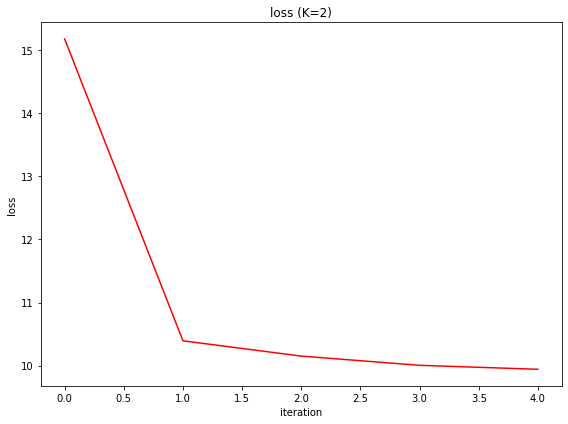

**************************************************
## [RESULT 06]
**************************************************


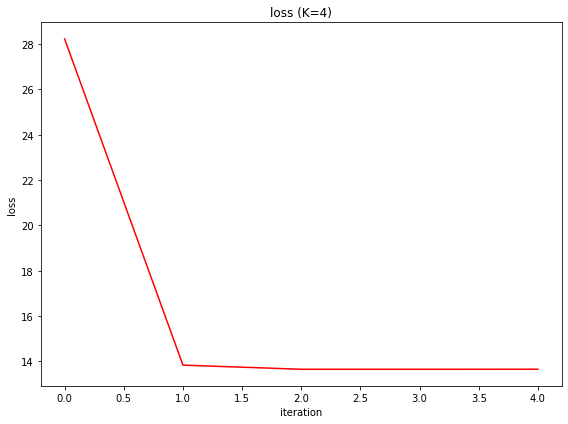

**************************************************
## [RESULT 07]
**************************************************


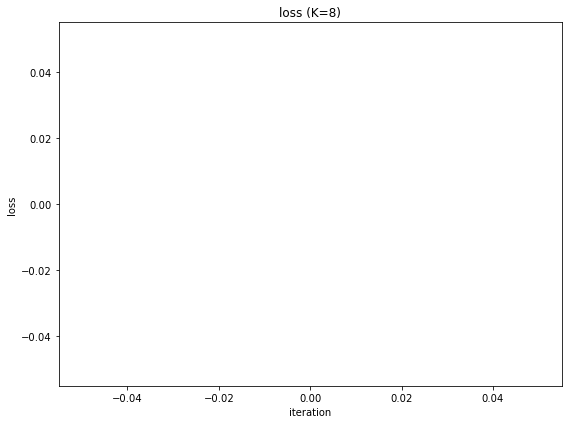

**************************************************
## [RESULT 08]
**************************************************


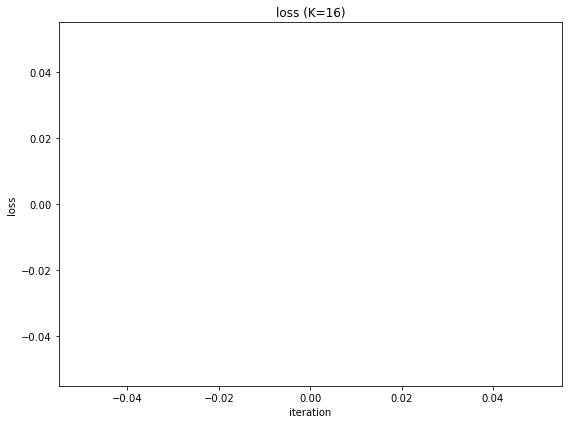

**************************************************
## [RESULT 09]
**************************************************
**************************************************
## [RESULT 10]
**************************************************
**************************************************
## [RESULT 11]
**************************************************
**************************************************
## [RESULT 12]
**************************************************
**************************************************
## [RESULT 13]
**************************************************
**************************************************
## [RESULT 14]
**************************************************
**************************************************
## [RESULT 15]
**************************************************
**************************************************
## [RESULT 16]
**************************************************


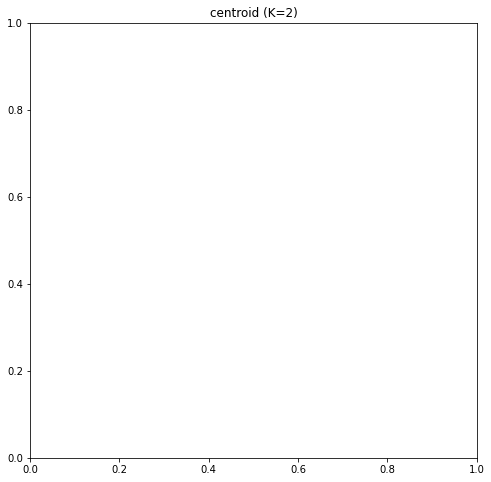

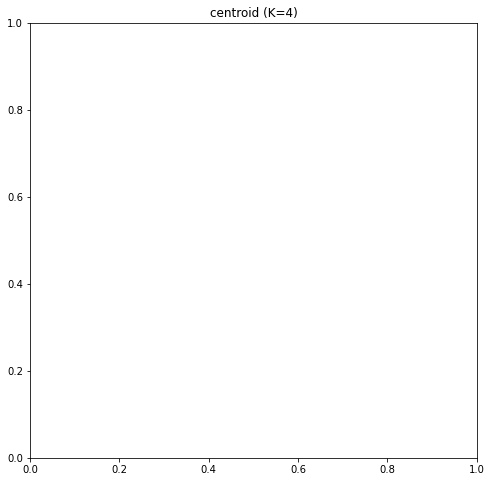

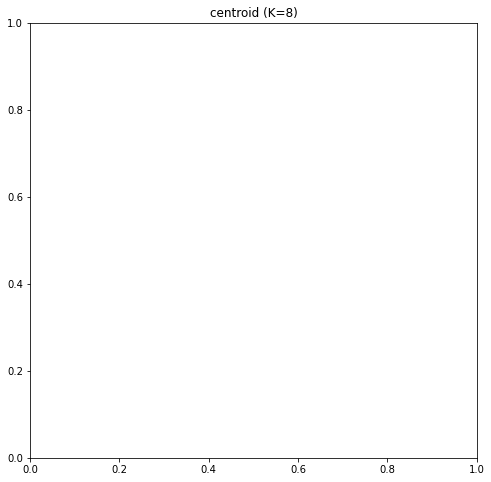

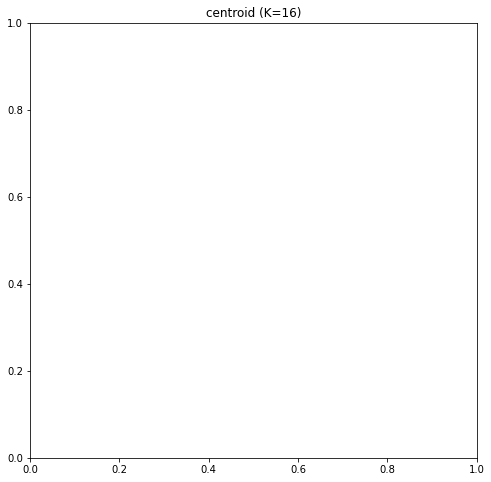

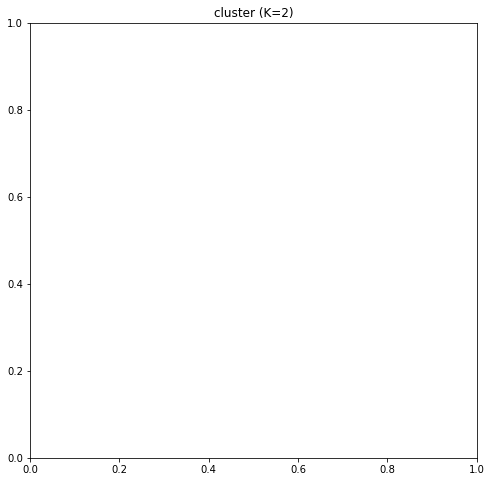

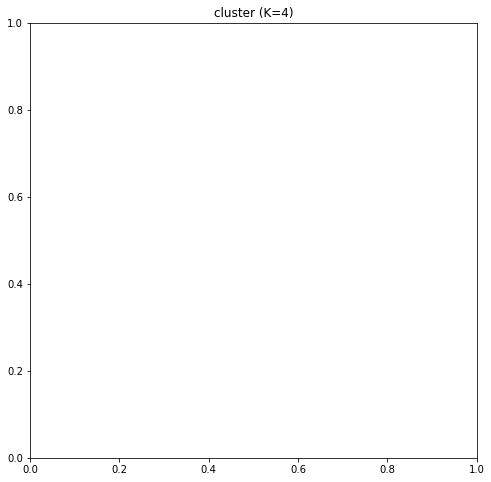

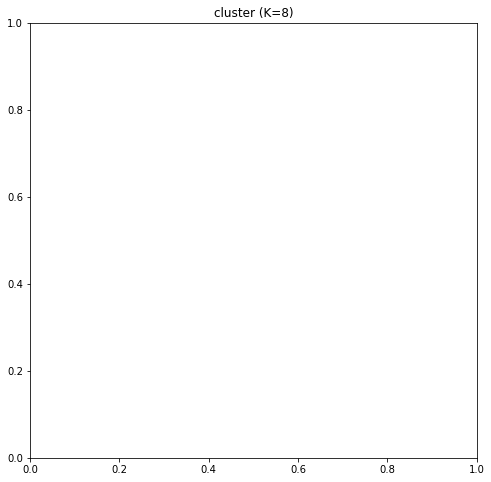

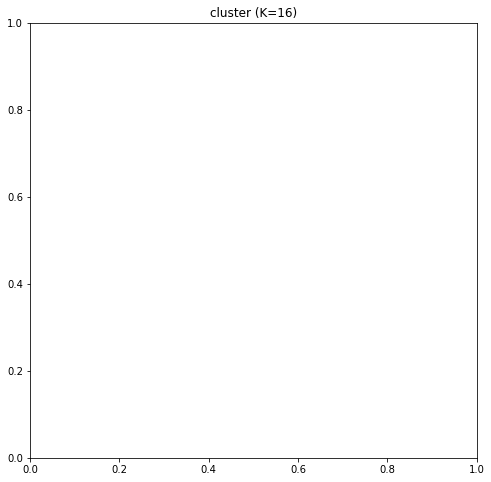

In [724]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)